<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/11%EC%9B%94%2003%EC%9D%BC/11%EC%9B%94_3%EC%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 웹 크롤링

In [ ]:
# 웹 크롤링을 위한 모듈 탑재
import requests

# 웹 스크래핑 주소 저장
url = 'https://finance.naver.com/item/sise_time.naver?code=006740&thistime=20231103140935&page=1'

# http 요청을 대상 주소로 보내고 http 응답 받아서 저장
page = requests.get(url)

# 응답 내용 확인하기
page.text  # 오류 출력됨 --> 해결방법? user-agent 정보 비어 있으므로 채워서 다시

# 헤더 정보 설정
my_headers = {'user-agent':'Mozilla/5.0'}

# 요청 헤더 설정하여 http 응답 받아오기
page = requests.get(url, headers=my_headers)

# 응답 내용 확인하기
print(page.text)


<html lang="ko">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버페이 증권</title>

<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/newstock.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/common.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/layout.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/main.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/newstock2.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/newstock3.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/world.css">
</head>
<body>
<script language="Jav

In [ ]:
# 판다스, 웹 크롤링
import pandas as pd

# html 페이지에서 테이블 추출
pages = pd.read_html(page.text)

# 추출한 데이터타입 확인
type(pages)

# 페이지 개수 확인
len(pages)

# 첫번째 테이블 내용 확인
pages[0]

# 두번째 테이블 내용 확인
pages[1]

# 페이지 번호 클릭하지 않고 데이터 가져오기(for문 사용)
new_url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page='
all_tables = pd.DataFrame()

for page_number in range(1, 2):
     full_url = new_url + str(page_number)
     print(f'{page_number} 번째 페이지 읽어오기({full_url})')
     page = requests.get(full_url, headers=my_headers)
     table = pd.read_html(page.text)[0]
     print(f'전체 {len(all_tables.index)} 줄 에 {len(table.index)} 줄 추가')
     all_tables = pd.concat([all_tables, table])
all_tables

# 결측치 확인 및 제거
all_tables.isnull().sum()
all_tables.dropna(inplace=True)
all_tables

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=1)
전체 0 줄 에 15 줄 추가


,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.11.03,69600.0,100.0,69700.0,70200.0,69600.0,7195279.0
2,2023.11.02,69700.0,1100.0,70000.0,70000.0,69400.0,16350031.0
3,2023.11.01,68600.0,1700.0,67500.0,68900.0,67300.0,13775256.0
4,2023.10.31,66900.0,400.0,67600.0,68300.0,66900.0,14488892.0
5,2023.10.30,67300.0,0.0,66800.0,67800.0,66700.0,10139270.0
9,2023.10.27,67300.0,600.0,67100.0,67300.0,66700.0,11334726.0
10,2023.10.26,66700.0,1300.0,67000.0,67900.0,66700.0,15517624.0
11,2023.10.25,68000.0,500.0,68800.0,68800.0,67900.0,10610703.0
12,2023.10.24,68500.0,100.0,68700.0,68800.0,67700.0,12791710.0
13,2023.10.23,68400.0,400.0,68700.0,69100.0,68200.0,11625959.0


In [ ]:
# 결측치 확인 및 제거
all_tables.isnull().sum()
all_tables.dropna(inplace=True)
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.11.03,69600.0,100.0,69700.0,70200.0,69600.0,7195279.0
2,2023.11.02,69700.0,1100.0,70000.0,70000.0,69400.0,16350031.0
3,2023.11.01,68600.0,1700.0,67500.0,68900.0,67300.0,13775256.0
4,2023.10.31,66900.0,400.0,67600.0,68300.0,66900.0,14488892.0
5,2023.10.30,67300.0,0.0,66800.0,67800.0,66700.0,10139270.0
9,2023.10.27,67300.0,600.0,67100.0,67300.0,66700.0,11334726.0
10,2023.10.26,66700.0,1300.0,67000.0,67900.0,66700.0,15517624.0
11,2023.10.25,68000.0,500.0,68800.0,68800.0,67900.0,10610703.0
12,2023.10.24,68500.0,100.0,68700.0,68800.0,67700.0,12791710.0
13,2023.10.23,68400.0,400.0,68700.0,69100.0,68200.0,11625959.0


In [ ]:
# 1~10 페이지 데이터 수집
new_url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page='
tables = pd.DataFrame()
for i in range(1,11):
    full = new_url + str(i)
    page = requests.get(full, headers=my_headers)
    table = pd.read_html(page.text)[0]
    tables = pd.concat([tables, table])
tables

# 결측치 제거
tables.isnull().sum()
tables.dropna(inplace=True)

# 컬럼 이름 변경
tables.rename(columns={'날짜':'date', '종가':'end_price', '시가':'start_price', '고가':'highest_price', '저가':'lowest_price'}, inplace=True)

# 필요없는 컬럼(전일비, 거래량 제거)
tables.drop(['전일비','거래량'],axis=1, inplace=True)
tables

,date,end_price,start_price,highest_price,lowest_price
1,2023.11.03,69600.0,69700.0,70200.0,69600.0
2,2023.11.02,69700.0,70000.0,70000.0,69400.0
3,2023.11.01,68600.0,67500.0,68900.0,67300.0
4,2023.10.31,66900.0,67600.0,68300.0,66900.0
5,2023.10.30,67300.0,66800.0,67800.0,66700.0
...,...,...,...,...,...
9,2023.06.15,71500.0,72100.0,72300.0,71300.0
10,2023.06.14,71900.0,72100.0,72200.0,71100.0
11,2023.06.13,72000.0,71700.0,72200.0,71600.0
12,2023.06.12,71000.0,72100.0,72400.0,70800.0


In [ ]:
# 오후 진도 부분
# 중앙값 추가하기(midian_price)
# 최소, 최대값의 중간
tables['midian_price'] = tables['highest_price'] - ((tables['highest_price'] - tables['lowest_price']) / 2)

# 일일 시세를 월별로 집계하기 위해 date 문자열로 변경 후,
# 일자 정보를 month 컬럼에 추가
# tables['date'] = pd.to_datetime(tables['date'])
# tables['month'] = tables['date'].dt.strftime('%Y.%m')
# tables['month'] = tables['date'].str[0:7]
tables.head()


# 데이터 가공은 끝나서 그래프 그리기 ㄱㄱ

# x축 숫자 설정 위해 set_index() 사용해서 색인 date로 변경 + 날짜 내림차순 ㅇㅇ
# tables.set_index('date', inplace=True)
tables.sort_index(inplace=True)
tables

,end_price,start_price,highest_price,lowest_price,midian_price,month
date,,,,,,
2023-06-09,72000.0,71100.0,72300.0,70800.0,71550.0,2023.06
2023-06-12,71000.0,72100.0,72400.0,70800.0,71600.0,2023.06
2023-06-13,72000.0,71700.0,72200.0,71600.0,71900.0,2023.06
2023-06-14,71900.0,72100.0,72200.0,71100.0,71650.0,2023.06
2023-06-15,71500.0,72100.0,72300.0,71300.0,71800.0,2023.06
...,...,...,...,...,...,...
2023-10-30,67300.0,66800.0,67800.0,66700.0,67250.0,2023.10
2023-10-31,66900.0,67600.0,68300.0,66900.0,67600.0,2023.10
2023-11-01,68600.0,67500.0,68900.0,67300.0,68100.0,2023.11


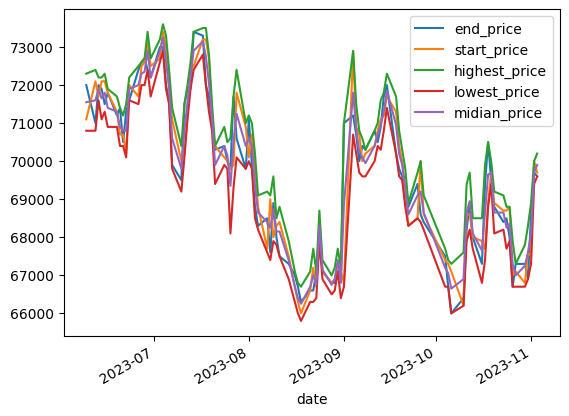

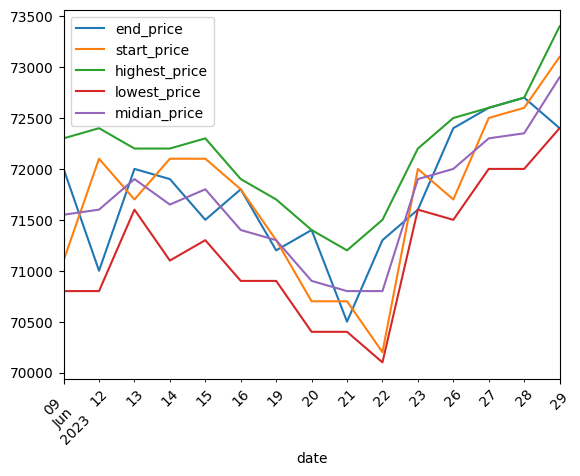

In [ ]:
# 선 그래프 그리기
import matplotlib.pyplot as plt
tables.plot.line()

# 앞 15일
tables[:15].plot.line(rot=45)
plt.show()

<Axes: title={'center': 'midian_price'}, xlabel='[month]'>

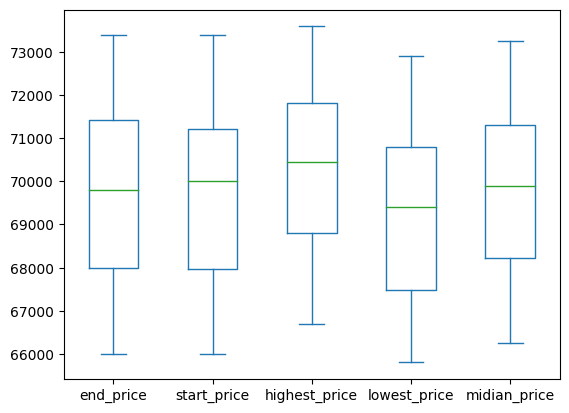

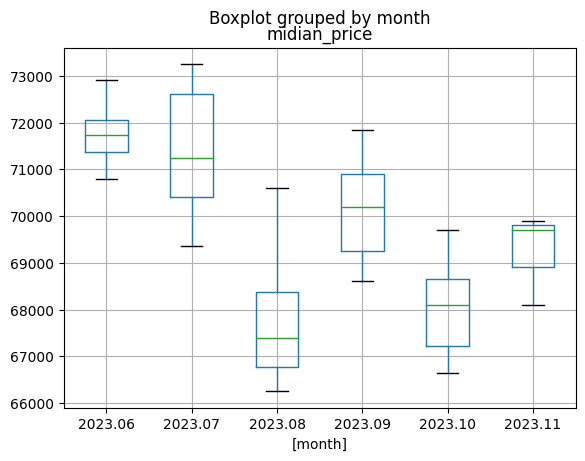

In [ ]:
# boxplot 그래프
tables.plot.box()

# 중앙값
tables.boxplot(column=['midian_price'], by=['month'])

## 웹 크롤러 과제

<Axes: xlabel='time'>

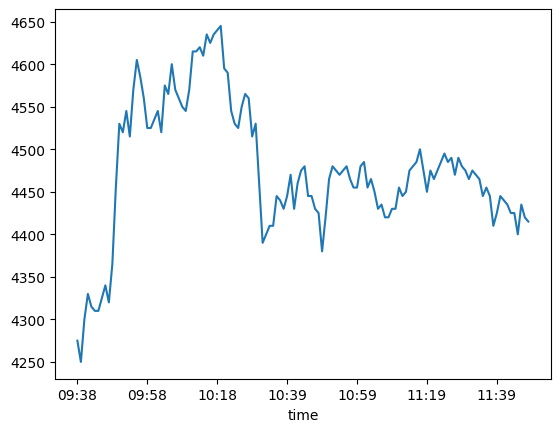

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

my_url = 'https://finance.naver.com/item/sise_time.naver?code=006740&thistime=20231103140935&page=1'

p = requests.get(my_url)
p.text

my_headers = {'user-agent':'Mozilla/5.0'}

# 요청 헤더 설정하여 http 응답 받아오기
page = requests.get(url, headers=my_headers)

# 응답 내용 확인하기
page.text

url = 'https://finance.naver.com/item/sise_time.naver?code=006740&thistime=20231103140935&page='
data = pd.DataFrame()
for i in range(15,28):
    fin_url = url + str(i)
    page = requests.get(fin_url, headers=my_headers)
    dat = pd.read_html(page.text)[0]
    data = pd.concat([data,dat])
data.tail()

data.dropna(inplace=True)

data.rename(columns={'체결시각':'time','체결가':'price', '매도':'sell', '매수':'buy','거래량':'amount', '변동량':'change'},inplace=True)
data.drop(['전일비'],axis=1,inplace=True)
data

data.set_index('time',inplace=True)
data.sort_index(inplace=True)
data['price'].plot.line()

Text(0.5, 1.0, 'Difference of Stock Trade Amount&Change')

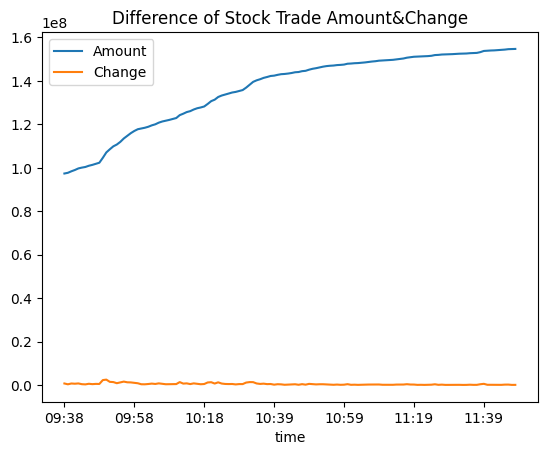

In [ ]:
data['amount'].plot.line(label='Amount')
data['change'].plot.line(label='Change')
plt.legend()
plt.title('Difference of Stock Trade Amount&Change')